In [2]:
# download dataset
import wget
datasetName = wget.download("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

100% [..............................................................................] 72629 / 72629

In [3]:
print(datasetName)

FuelConsumptionCo2.csv


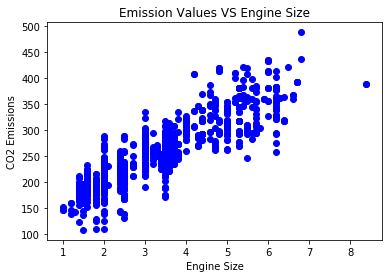

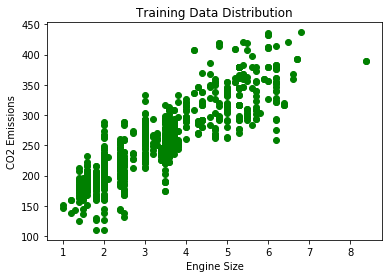

The Intercept:  [125.07050437]
The Coefficient:  [[39.20218372]]


In [14]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# read dataset into df
df = pd.read_csv(datasetName)

# peek at the dataset
# df.head()

# select some features for regression
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

# peek at the selection
# cdf.head()

# plot emission values with respect to the engine size
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Emission Values VS Engine Size')
plt.show()

# perform train/test split
# randomly select 80% of the observations as the train dataset
# ... and the remaining 20% as the test dataset using a mask
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# check the training data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'green')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Training Data Distribution')
plt.show()

# create a linear regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Dependent Variable: Engine Size
train_x = np.asanyarray(train[['ENGINESIZE']])

# Independent Variable: CO2 Emissions
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# fit x and y into a fitting line
regr.fit(train_x, train_y)

# Theta 0
print('The Intercept: ', regr.intercept_)
# Theta 1
print('The Coefficient: ', regr.coef_)
